In [87]:
# AC-GAN Github Example: https://github.com/clvrai/ACGAN-PyTorch/

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn.functional as F

In [97]:
# Config

n_epochs = 10000
d_learning_rate = 0.0002
g_learning_rate = 0.0001
momentum = 0.5
print_interval = 100
batch_size = 4
d_steps = 50
g_steps = 128

transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))])

In [90]:
def get_noise():
    return torch.rand(batch_size,49)

def plot_img(array,number=None):
    array = array.detach()
    array = array.reshape(28,28)
    
    plt.imshow(array,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if number:
        plt.xlabel(number,fontsize='x-large')
    plt.show()

In [91]:
train_loader = torch.utils.data.DataLoader(
                              datasets.MNIST('../data/', train=True, download=True,
                                 transform=transform),
                              batch_size=batch_size, shuffle=True)

#test_loader = torch.utils.data.DataLoader(
#                              datasets.MNIST('../data/', train=False, download=True,
#                                 transform=transform),
#                              batch_size=batch_size, shuffle=True)

In [92]:
class generator(nn.Module):
    
    def __init__(self):
        
        super(generator, self).__init__()
        
        self.lin1 = nn.Linear(49, 49 * 64)
        self.convt1 = nn.ConvTranspose2d(64, 64, 4, stride=2, padding=1)
        self.convt2 = nn.ConvTranspose2d(64, 64, 4, stride=2, padding=1)
        self.conv = nn.Conv2d(64, 1, 5, padding=2)
        
        nn.init.xavier_uniform_(self.lin1.weight)
        nn.init.xavier_uniform_(self.convt1.weight)
        nn.init.xavier_uniform_(self.convt2.weight)
        nn.init.xavier_uniform_(self.conv.weight)
        
    def forward(self, x):
        x = F.leaky_relu(self.lin1(x), negative_slope=0.2)
        x = x.view(batch_size, 64, 7, 7)  # 7x7
        x = F.leaky_relu(self.convt1(x), negative_slope=0.2)  # 14x14
        x = F.leaky_relu(self.convt2(x), negative_slope=0.2)  # 28x28
        x = F.sigmoid(self.conv(x))
        return x

In [93]:
class discriminator(nn.Module):
    
    def __init__(self):
        
        super(discriminator, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        self.flatten = nn.Flatten()
        self.lin1 = nn.Linear(32*7*7, 1)
        
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.xavier_uniform_(self.conv2.weight)
        nn.init.xavier_uniform_(self.lin1.weight)
        
    def forward(self, x):  # 28x28
        x = F.dropout2d(F.leaky_relu(self.conv1(x), negative_slope=0.2), p=0.4)  # 14x14
        x = F.dropout2d(F.leaky_relu(self.conv2(x), negative_slope=0.2), p=0.4)  # 7x7
        x = x.view(batch_size, 32 * 7 * 7)
        x = F.sigmoid(self.lin1(x))
        return x

In [94]:
dis = discriminator().cuda()
gen = generator().cuda()

criteriond1 = nn.BCELoss()
optimizerd1 = optim.Adam(dis.parameters(), lr=d_learning_rate, betas=(momentum,0.999))

criteriond2 = nn.BCELoss()
optimizerd2 = optim.Adam(gen.parameters(), lr=g_learning_rate, betas=(momentum,0.999))

========0========
Avg Real Loss: 0.0
Avg Fake Loss: 2.145769940398168e-08


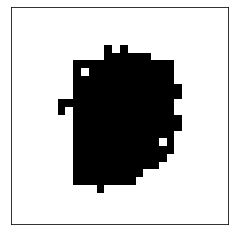




========100========
Avg Real Loss: 0.00017942827025159148
Avg Fake Loss: 0.00024957721459571757


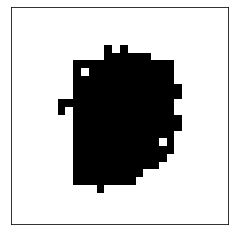




========200========
Avg Real Loss: 8.801314205229006e-05
Avg Fake Loss: 0.0006066007161065557


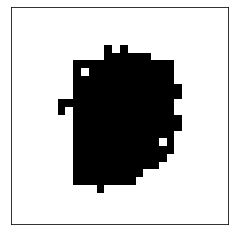




========300========
Avg Real Loss: 0.000125606306982462
Avg Fake Loss: 0.00021962013498196597


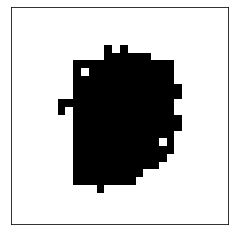




========400========
Avg Real Loss: 0.0003396395239209227
Avg Fake Loss: 0.0003890810574149839


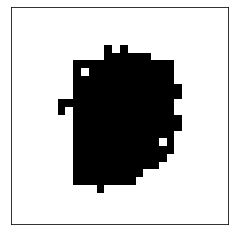




========500========
Avg Real Loss: 0.00013772715426576098
Avg Fake Loss: 0.00024436652237803003


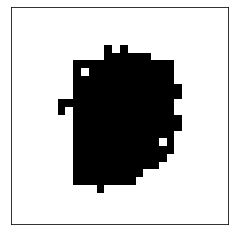




========600========
Avg Real Loss: 2.7555708822646353e-05
Avg Fake Loss: 0.0001508054260552427


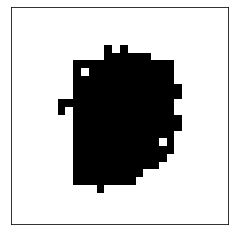




========700========
Avg Real Loss: 0.01085441788329625
Avg Fake Loss: 0.0010070456398106132


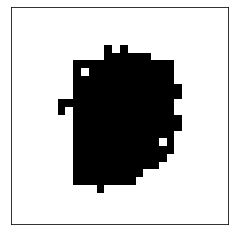




========800========
Avg Real Loss: 5.70616055483697e-06
Avg Fake Loss: 0.002174923588957682


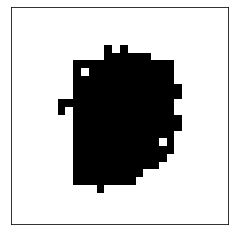




========900========
Avg Real Loss: 0.00017911476773747382
Avg Fake Loss: 0.00028668977757341453


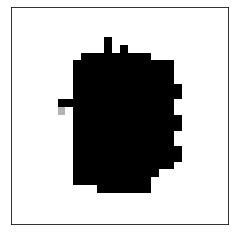




========1000========
Avg Real Loss: 0.0025385231043524924
Avg Fake Loss: 0.000747838429113017


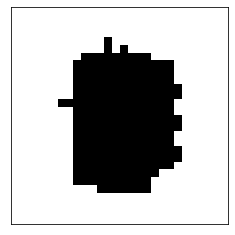




========1100========
Avg Real Loss: 2.36540942589869e-05
Avg Fake Loss: 0.00020002183086887727


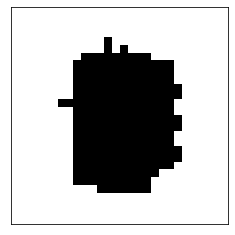




========1200========
Avg Real Loss: 7.742201413591942e-06
Avg Fake Loss: 0.00020952813969358887


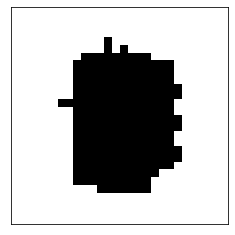




========1300========
Avg Real Loss: 1.8936779068212673e-06
Avg Fake Loss: 0.0004154229972620271


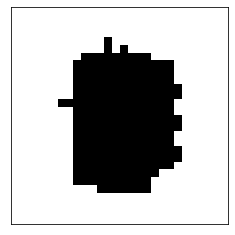




========1400========
Avg Real Loss: 0.0002923268304097348
Avg Fake Loss: 0.0005009913113116226


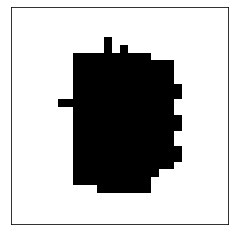




========1500========
Avg Real Loss: 4.0403091646936675e-05
Avg Fake Loss: 8.427832345518026e-05


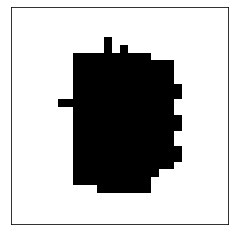




========1600========
Avg Real Loss: 9.041912495248994e-06
Avg Fake Loss: 0.0002894740947139951


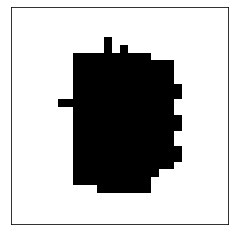




========1700========
Avg Real Loss: 7.78371760329577e-05
Avg Fake Loss: 0.00019866832870981454


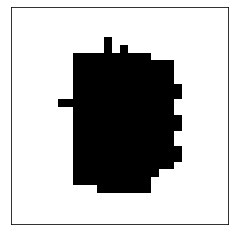




========1800========
Avg Real Loss: 2.896593639761136e-05
Avg Fake Loss: 0.00010471721402232958


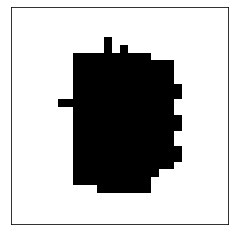




========1900========
Avg Real Loss: 0.000110561667053517
Avg Fake Loss: 0.00058425775399229


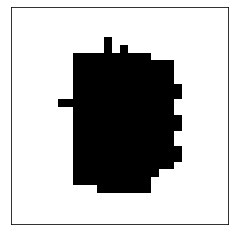




========2000========
Avg Real Loss: 1.1174010571295412e-05
Avg Fake Loss: 0.00014207343599942135


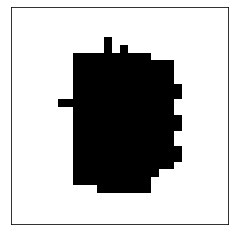




========2100========
Avg Real Loss: 5.210467487501091e-05
Avg Fake Loss: 6.848301150697012e-05


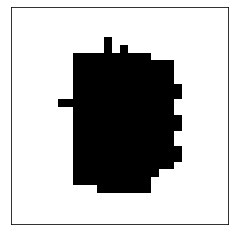




========2200========
Avg Real Loss: 1.4987736961700192e-05
Avg Fake Loss: 7.098595695403275e-05


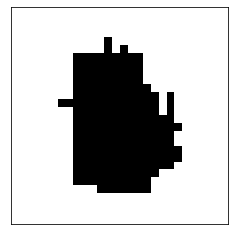




========2300========
Avg Real Loss: 2.438434077795648e-05
Avg Fake Loss: 6.283704093974052e-05


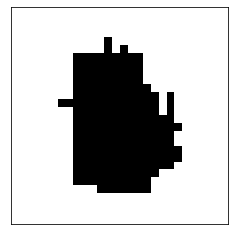




========2400========
Avg Real Loss: 6.868612001319719e-05
Avg Fake Loss: 5.85159728599649e-05


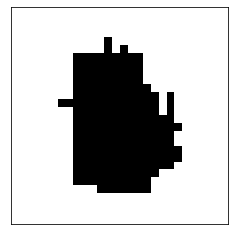




========2500========
Avg Real Loss: 0.00013320588014387625
Avg Fake Loss: 7.103610454670673e-05


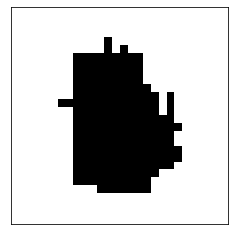




========2600========
Avg Real Loss: 6.365483665859983e-06
Avg Fake Loss: 0.00017547289888810268


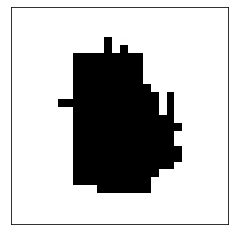




========2700========
Avg Real Loss: 4.445082942126533e-05
Avg Fake Loss: 0.00012434158179310372


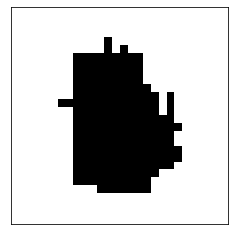




========2800========
Avg Real Loss: 1.150521021173745e-05
Avg Fake Loss: 0.0002306475273801567


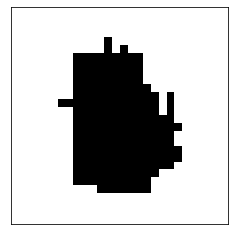




========2900========
Avg Real Loss: 0.0028043869030541656
Avg Fake Loss: 0.00013590052837678002


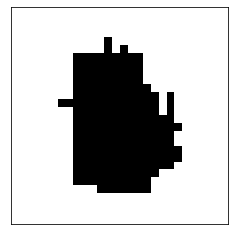




========3000========
Avg Real Loss: 2.3842062610413e-07
Avg Fake Loss: 0.00017546516594975969


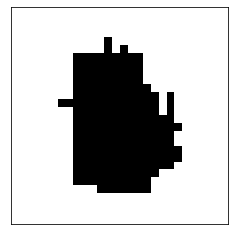




========3100========
Avg Real Loss: 0.0002048460969356114
Avg Fake Loss: 0.0001466597258581004


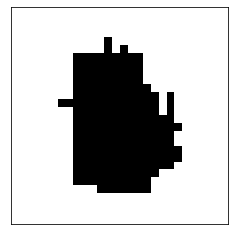




========3200========
Avg Real Loss: 6.878620004613367e-07
Avg Fake Loss: 0.00012957022517269933


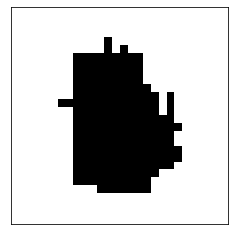




========3300========
Avg Real Loss: 3.409428244793844e-07
Avg Fake Loss: 0.0001072985308921659


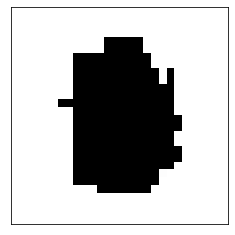




========3400========
Avg Real Loss: 4.968636926250269e-06
Avg Fake Loss: 0.00010449041700709927


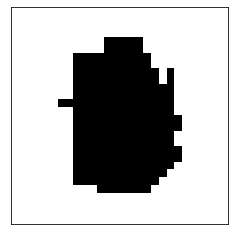




========3500========
Avg Real Loss: 4.768410646249777e-07
Avg Fake Loss: 5.1295891965779106e-05


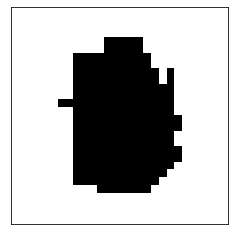




========3600========
Avg Real Loss: 1.7140278490046512e-06
Avg Fake Loss: 3.4348775981385414e-05


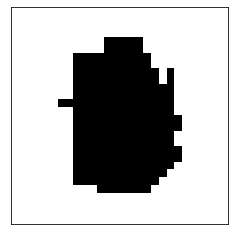




========3700========
Avg Real Loss: 1.8320126432342932e-05
Avg Fake Loss: 7.542905055544225e-05


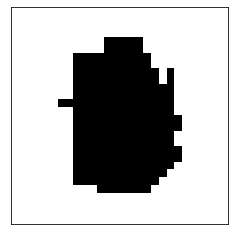




========3800========
Avg Real Loss: 2.6449852962713295e-05
Avg Fake Loss: 6.901943269319589e-05


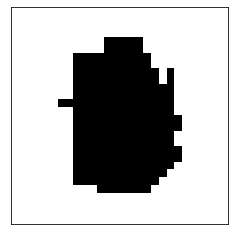




========3900========
Avg Real Loss: 1.2832451923472377e-05
Avg Fake Loss: 2.8595003573599343e-05


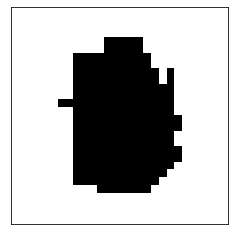




========4000========
Avg Real Loss: 3.3972678937743693e-06
Avg Fake Loss: 7.070522286916513e-05


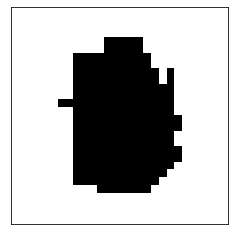




========4100========
Avg Real Loss: 2.625946933321188e-06
Avg Fake Loss: 3.498206454487729e-05


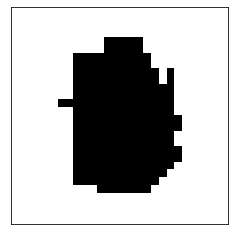




========4200========
Avg Real Loss: 6.925668919421923e-06
Avg Fake Loss: 7.1362843266769e-05


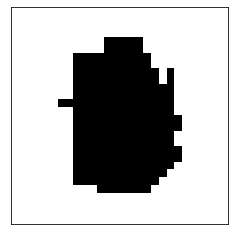




========4300========
Avg Real Loss: 0.00030047853892625656
Avg Fake Loss: 3.152592798798537e-05


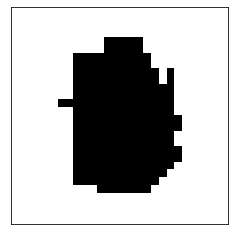




========4400========
Avg Real Loss: 1.3971960580221321e-05
Avg Fake Loss: 5.4949507481723004e-05


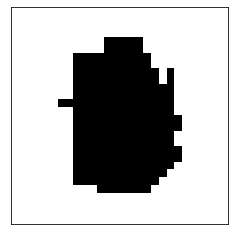




========4500========
Avg Real Loss: 7.313664587371704e-07
Avg Fake Loss: 0.00013048637095870676


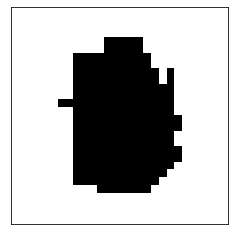




========4600========
Avg Real Loss: 0.00021736058950921233
Avg Fake Loss: 4.051230136717265e-05


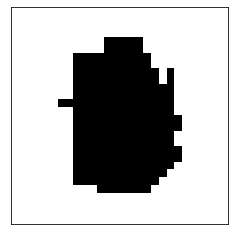




========4700========
Avg Real Loss: 1.1503785863453685e-07
Avg Fake Loss: 6.970026876750524e-05


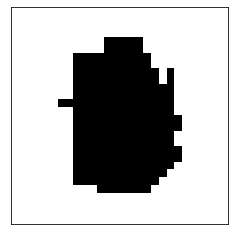




========4800========
Avg Real Loss: 4.263221289448893e-06
Avg Fake Loss: 0.00010519403014264128


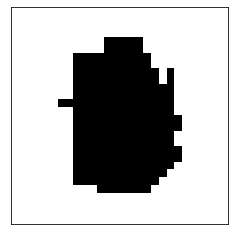




========4900========
Avg Real Loss: 2.880506456222065e-06
Avg Fake Loss: 1.414882123178529e-05


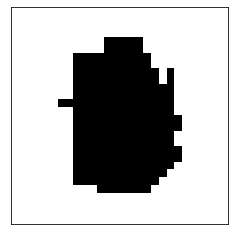




========5000========
Avg Real Loss: 1.8477678651152018e-07
Avg Fake Loss: 2.3046830630590875e-05


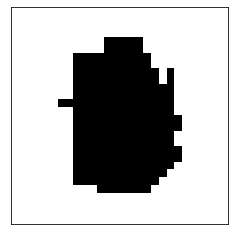




========5100========
Avg Real Loss: 9.65598281510438e-08
Avg Fake Loss: 2.2593472092964363e-05


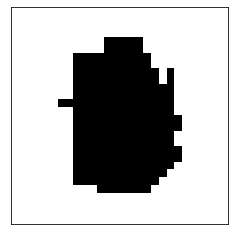




========5200========
Avg Real Loss: 0.00031458225195329703
Avg Fake Loss: 4.392092445947071e-05


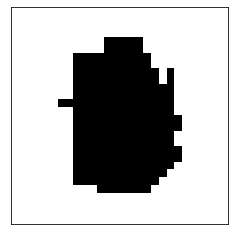




========5300========
Avg Real Loss: 1.496084292540445e-07
Avg Fake Loss: 3.367627938672513e-05


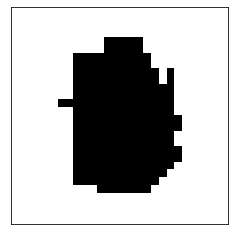




========5400========
Avg Real Loss: 3.920065806632067e-05
Avg Fake Loss: 8.977711859913029e-05


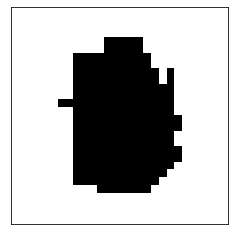




========5500========
Avg Real Loss: 5.0664071125083866e-08
Avg Fake Loss: 1.602129686283149e-05


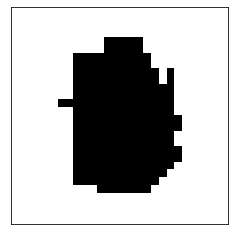




========5600========
Avg Real Loss: 3.6121321684845497e-07
Avg Fake Loss: 3.544382860845019e-05


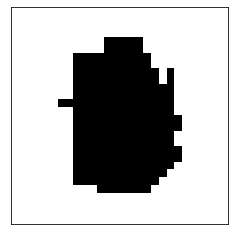




========5700========
Avg Real Loss: 1.7285363469454752e-08
Avg Fake Loss: 3.4351241791839016e-05


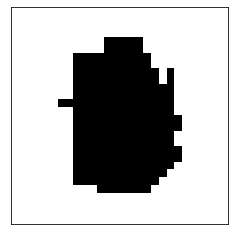




========5800========
Avg Real Loss: 6.556512772704082e-09
Avg Fake Loss: 5.0488911115422754e-05


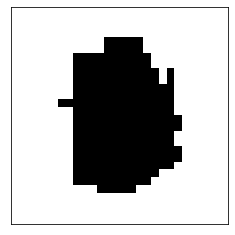




========5900========
Avg Real Loss: 2.5033961961185015e-08
Avg Fake Loss: 3.639882975676301e-05


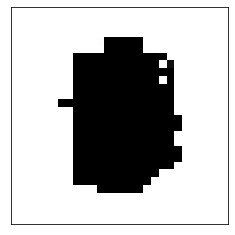




========6000========
Avg Real Loss: 1.442444735744175e-07
Avg Fake Loss: 1.1815602091260757e-05


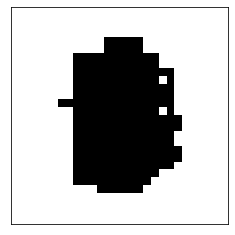




========6100========
Avg Real Loss: 3.2186556140345603e-08
Avg Fake Loss: 1.53012413354503e-05


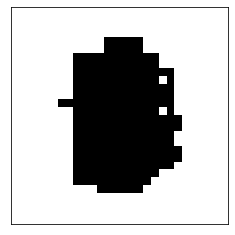




========6200========
Avg Real Loss: 2.3093224953640856e-05
Avg Fake Loss: 4.759963315876803e-06


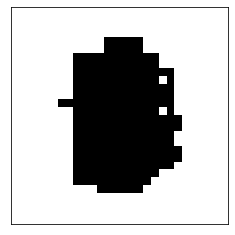




========6300========
Avg Real Loss: 1.1324946662227831e-07
Avg Fake Loss: 1.5164451671836331e-05


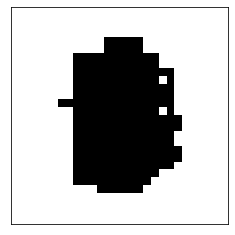




========6400========
Avg Real Loss: 7.7486182661346e-08
Avg Fake Loss: 2.36021144574039e-05


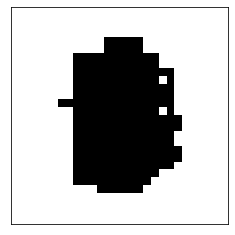




========6500========
Avg Real Loss: 0.0013602606952905917
Avg Fake Loss: 0.0002216238933384318


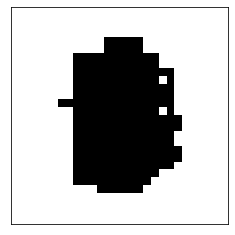




========6600========
Avg Real Loss: 0.0
Avg Fake Loss: 0.00018243335343015588


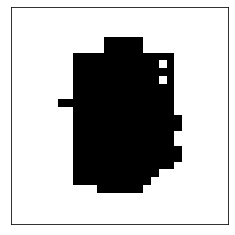




========6700========
Avg Real Loss: 1.186144500309183e-07
Avg Fake Loss: 0.00018857650181040243


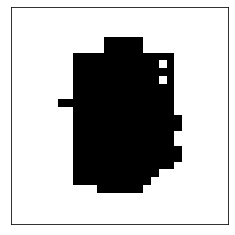




========6800========
Avg Real Loss: 5.960465188081798e-10
Avg Fake Loss: 2.5212401062617573e-05


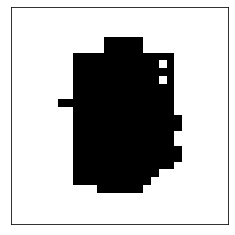




========6900========
Avg Real Loss: 4.231939783494454e-08
Avg Fake Loss: 3.292481129207658e-05


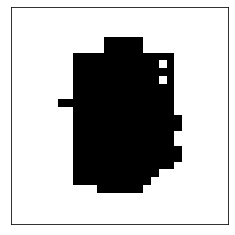




========7000========
Avg Real Loss: 1.1920930376163596e-09
Avg Fake Loss: 5.6319793965755596e-05


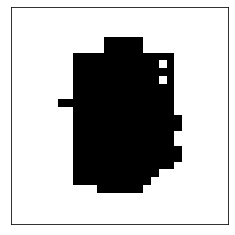




========7100========
Avg Real Loss: 1.4901169436143392e-08
Avg Fake Loss: 2.8889657981707728e-05


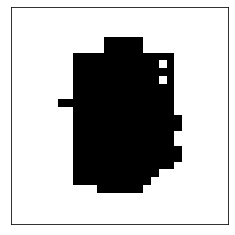




========7200========
Avg Real Loss: 2.324586382940197e-08
Avg Fake Loss: 1.8344205674267754e-05


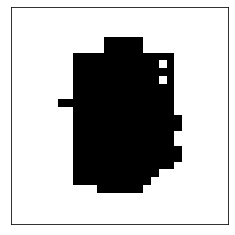




========7300========
Avg Real Loss: 0.0
Avg Fake Loss: 1.9826153149509197e-05


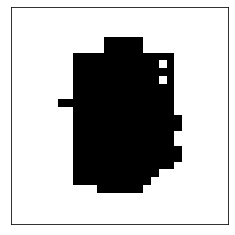




========7400========
Avg Real Loss: 4.4764415179088247e-07
Avg Fake Loss: 1.2935483535869707e-05


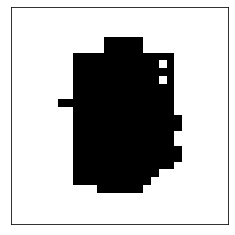




========7500========
Avg Real Loss: 1.3113030377098766e-08
Avg Fake Loss: 2.5498145541718033e-05


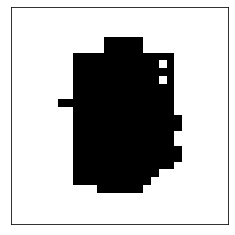




========7600========
Avg Real Loss: 7.748610073576855e-09
Avg Fake Loss: 7.176930723602481e-06


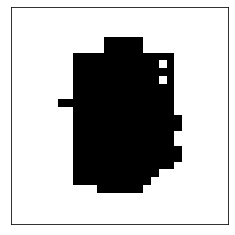




========7700========
Avg Real Loss: 2.384186146286993e-09
Avg Fake Loss: 7.213136247493424e-05


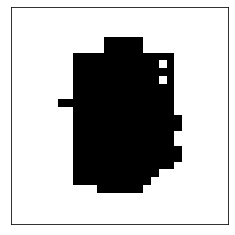




========7800========
Avg Real Loss: 3.106846248229544e-05
Avg Fake Loss: 1.1430851871594428e-05


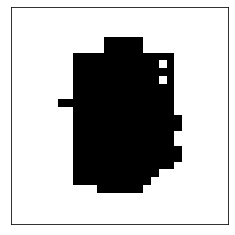




========7900========
Avg Real Loss: 1.1920936699993944e-08
Avg Fake Loss: 1.168564083968704e-06


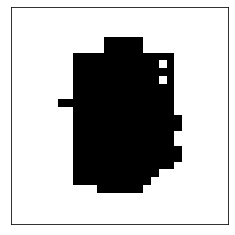




========8000========
Avg Real Loss: 2.0265944279174163e-07
Avg Fake Loss: 5.395570929422888e-06


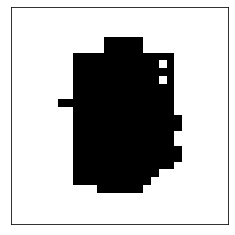




========8100========
Avg Real Loss: 8.940700766402188e-09
Avg Fake Loss: 1.4907860971504761e-05


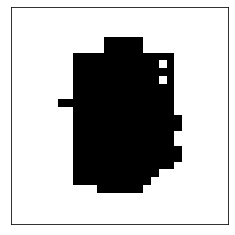




========8200========
Avg Real Loss: 3.22711633110373e-06
Avg Fake Loss: 5.128390954212137e-06


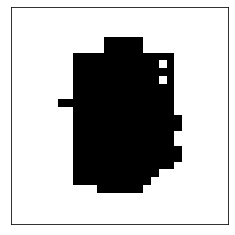




========8300========
Avg Real Loss: 1.1920930376163596e-09
Avg Fake Loss: 1.1240342671854365e-05


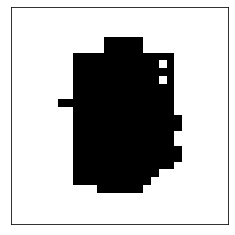




========8400========
Avg Real Loss: 5.185626605452853e-08
Avg Fake Loss: 2.9129911882819215e-06


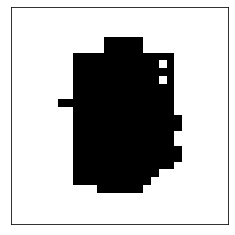




========8500========
Avg Real Loss: 8.82155411829899e-08
Avg Fake Loss: 3.97345636744717e-05


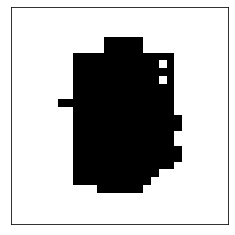




========8600========
Avg Real Loss: 1.4305129880654022e-08
Avg Fake Loss: 2.702903692011205e-06


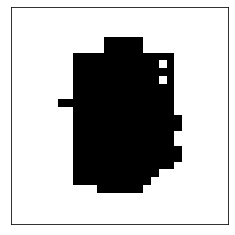




========8700========
Avg Real Loss: 3.814704214732956e-08
Avg Fake Loss: 9.203244697886248e-07


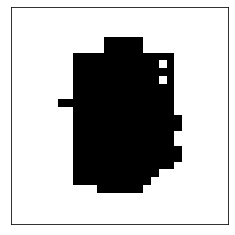




========8800========
Avg Real Loss: 6.759617114937555e-07
Avg Fake Loss: 9.751684732606237e-07


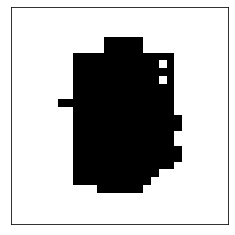




========8900========
Avg Real Loss: 2.73591988459998e-07
Avg Fake Loss: 4.439020168476304e-06


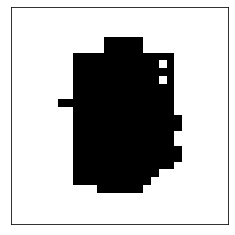




========9000========
Avg Real Loss: 5.67466426844021e-07
Avg Fake Loss: 1.245167644512435e-06


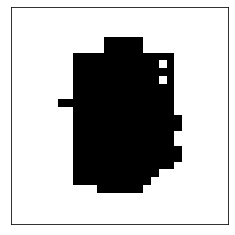




========9100========
Avg Real Loss: 1.788139627478813e-09
Avg Fake Loss: 1.5534539270518622e-05


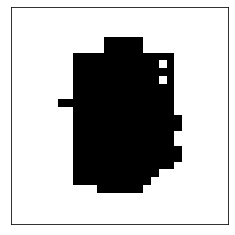




========9200========
Avg Real Loss: 4.1723341510646606e-08
Avg Fake Loss: 1.7098631472123316e-06


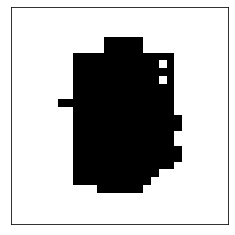




========9300========
Avg Real Loss: 2.455766031062012e-07
Avg Fake Loss: 1.390019384288621e-06


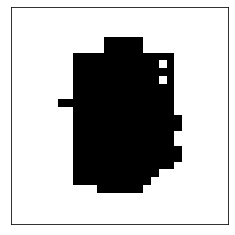




========9400========
Avg Real Loss: 4.915931604045909e-06
Avg Fake Loss: 6.324093345000392e-07


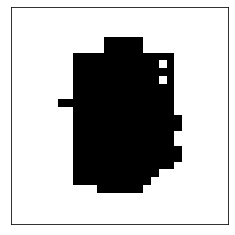




========9500========
Avg Real Loss: 2.2232704651514724e-07
Avg Fake Loss: 1.480390819537547e-05


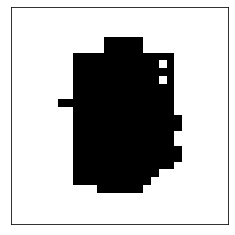




========9600========
Avg Real Loss: 2.3841863594498138e-09
Avg Fake Loss: 8.764956051265926e-07


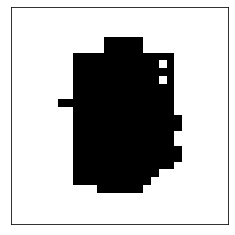




========9700========
Avg Real Loss: 1.1920930376163596e-09
Avg Fake Loss: 1.1804882892363367e-06


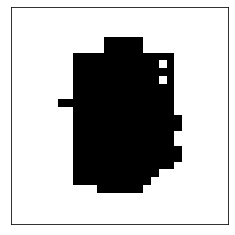




========9800========
Avg Real Loss: 2.688233077918767e-07
Avg Fake Loss: 1.0603837939981987e-06


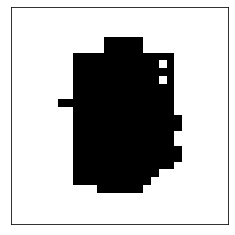




========9900========
Avg Real Loss: 7.105367697590736e-07
Avg Fake Loss: 5.319761984878824e-07


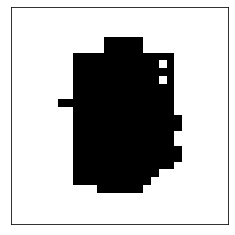




========10000========
Avg Real Loss: 2.0265605940039677e-08
Avg Fake Loss: 4.2855925606488656e-07


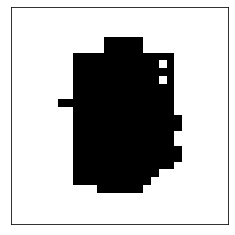

In [98]:
running_fake_loss = 0.0
running_real_loss = 0.0

for epoch in range(n_epochs + 1):
    # training discriminator
    #for d_step in range(d_steps):
    dis.zero_grad()

    # training discriminator on real data
    for inp_real,t in train_loader:
        inp_real_x = inp_real.cuda()
        target = t.cuda()
        break

    dis_real_out = dis(inp_real_x)
    dis_real_loss = criteriond1(dis_real_out, Variable(torch.ones(batch_size, 1)).cuda())
    dis_real_loss.backward()

    running_real_loss += dis_real_loss.item()

    # training discriminator on data produced by generator
    inp_fake_x_gen = get_noise().cuda()
    #output from generator is generated        
    dis_inp_fake_x = gen(inp_fake_x_gen).detach().reshape(batch_size, 1, 28, 28)
    dis_fake_out = dis(dis_inp_fake_x)
    dis_fake_loss = criteriond1(dis_fake_out, Variable(torch.zeros(batch_size,1)).cuda())
    dis_fake_loss.backward()

    running_fake_loss += dis_fake_loss.item()

    optimizerd1.step()
        
        
            
    # training generator
    #for g_step in range(g_steps):
    gen.zero_grad()

    #generating data for input for generator
    gen_inp = get_noise().cuda()

    gen_out = gen(gen_inp)

    dis_out_gen_training = dis(gen_out)
    gen_loss = criteriond2(dis_out_gen_training, Variable(torch.ones(batch_size,1)).cuda())
    gen_loss.backward()

    optimizerd2.step()
        
    if epoch%print_interval==0:
        print("========" + str(epoch) + "========")
        print("Avg Real Loss: " + str(running_real_loss / d_steps))
        print("Avg Fake Loss: " + str(running_fake_loss / d_steps))
        running_real_loss = 0.0
        running_fake_loss = 0.0
        plot_img(gen_out[0].cpu())
        print("\n\n")